# Quantum Circuit Simulation with Runtime Analysis
For this task, we had implement a statevector simulator for quantum circuits from scratch. The goal is to demystify how to simulate a quantum computer and to demonstrate familiarity with quantum circuits.

## 1. Naive simulation using matrix multiplication

In [7]:
# Import necessary libraries
import numpy as np
import time

First, we define the single-qubit gates (Pauli-X, Hadamard, and Identity) and the CNOT gate for two qubits.

In [8]:
# Define single-qubit gates
X = np.array([[0, 1],              [1, 0]])  # Pauli-X gate
H = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],              
              [1/np.sqrt(2), -1/np.sqrt(2)]])  # Hadamard gate
I = np.eye(2)  # Identity gate

# Define CNOT gate for two qubits
CNOT_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0], 
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])  # CNOT gate


Here, Pauli-X is essentially a quantum NOT gate. The Hadamard gate creates superposition states. The CNOT gate is a two-qubit operation that flips the target qubit if the control qubit is in state |1>.

Next, we define a function apply_circuit to apply the quantum gates to the qubits sequentially.

In [5]:
# Define the quantum circuit
def apply_circuit(n_qubits):
    # Create the initial state vector
    state_vector = np.zeros(2**n_qubits)
    state_vector[0] = 1  # Set the initial state to |000>

    # Apply the quantum gates sequentially
    for i in range(n_qubits):
        # Apply H gate to the i-th qubit
        state_vector = np.kron(np.eye(2**i), np.kron(H, np.eye(2**(n_qubits-i-1)))) @ state_vector

        # Apply CNOT gate with control qubit as the i-th qubit and target qubit as the (i+1)-th qubit
        if i < n_qubits - 1:
            state_vector = np.kron(np.eye(2**i), np.kron(CNOT_matrix, np.eye(2**(n_qubits-i-2)))) @ state_vector

        # Apply X gate to the i-th qubit
        state_vector = np.kron(np.eye(2**i), np.kron(X, np.eye(2**(n_qubits-i-1)))) @ state_vector

    return state_vector

In this function, we initialize the state vector to |000>. We then apply the Hadamard, CNOT, and Pauli-X gates to each qubit in sequence. np.kron is used to perform the Kronecker product, which helps in constructing the multi-qubit gate matrices.

Now, we measure the runtime required to apply the quantum circuit to different numbers of qubits.

In [12]:
import matplotlib.pyplot as plt

# Measure the runtime for different number of qubits
n_qubits_list = range(1, 11)
runtimes = []

for n_qubits in n_qubits_list:
    start_time = time.time()
    apply_circuit(n_qubits)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)

We use the time module to measure the runtime for applying the circuit to various numbers of qubits. The start_time and end_time are used to calculate the runtime for each qubit size.

Finally, we plot the runtime as a function of the number of qubits.

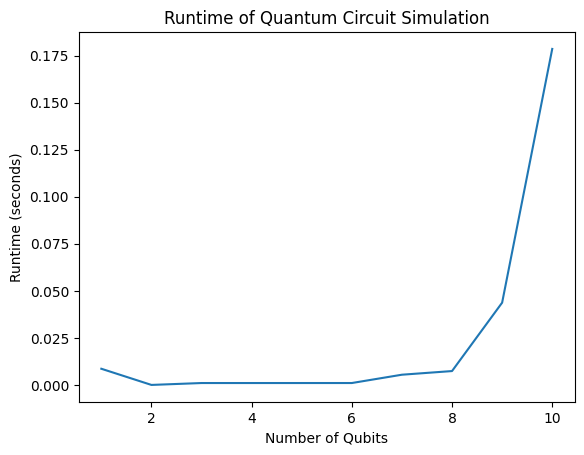

In [13]:
# Plot the runtime as a function of the number of qubits
plt.plot(n_qubits_list, runtimes)
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime of Quantum Circuit Simulation')
plt.show()

This plot helps us visualize how the runtime increases with the number of qubits in the circuit.